In [35]:
import pandas as pd
#from pandas.plotting import autocorrelation_plot
from statsmodels.tsa import stattools
import numpy as np
import os
from matplotlib import pyplot as plt

print(os.getcwd())
print(os.listdir())

C:\Users\sudramak\SuperDS projects\Global Warming
['.ipynb_checkpoints', 'case_study_028_solution.ipynb', 'Global Warming - Part 2.ipynb', 'Global Warming.ipynb', 'Temp.xlsx', 'Warming.csv']


In [15]:
df = pd.read_excel('Temp.xlsx')

In [16]:
df.head(5)

,Month,Value
0,1880-01-01,-0.01
1,1880-02-01,-0.13
2,1880-03-01,-0.14
3,1880-04-01,-0.06
4,1880-05-01,-0.08


In [17]:
df.tail(5)

,Month,Value
1645,2017-02-01 00:00:00,0.97
1646,2017-03-01 00:00:00,1.03
1647,2017-04-01 00:00:00,0.90
1648,2017-05-01 00:00:00,0.83
1649,2017-06-01 00:00:00,0.82


In [18]:
df.Month = df.Month.values.astype('datetime64[D]')

In [19]:
df.dtypes

Month    datetime64[ns]
Value           float64
dtype: object

In [30]:
df.index = df.Month
df = df.drop(labels='Month',axis=1)
df.head(5)

,Value
Month,
1880-01-01,-0.01
1880-02-01,-0.13
1880-03-01,-0.14
1880-04-01,-0.06
1880-05-01,-0.08


In [34]:
ts = df['1976':]

In [45]:
r_mean_12 = ts.rolling(window = 12,center=False).mean()
r_mean_120 = ts.rolling(window=120,center=False).mean()
r_mean_2 = ts.rolling(window=2,center=False).mean()
r_mean_1 = ts.rolling(window=1,center=False).mean()

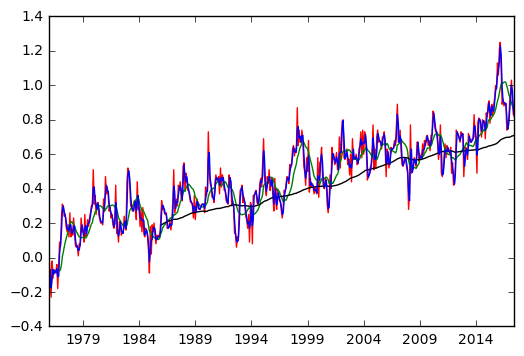

In [50]:
plt.plot(ts,color='r')
plt.plot(r_mean_12,color='g')
plt.plot(r_mean_120,color ='black')
plt.plot(r_mean_2,color='b')
plt.show()

In [55]:
from statsmodels.tsa import stattools, seasonal
decompose = seasonal.seasonal_decompose(ts)
decompose_residual = decompose.resid
decompose_seasonal = decompose.seasonal
decompose_trend = decompose.trend

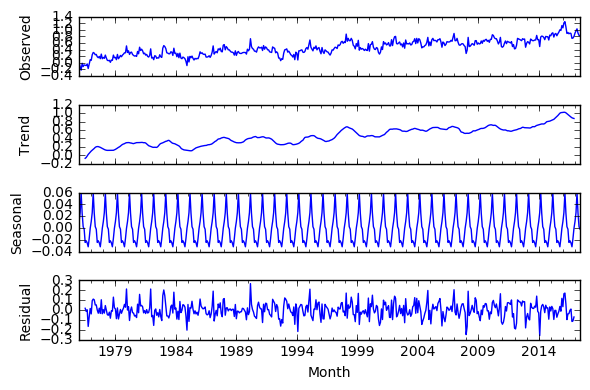

In [60]:
decompose.plot()

In [76]:
remove_col = decompose_residual[decompose_residual.Value.isnull()].index

In [74]:
decompose_seasonal[decompose_seasonal.Value.isnull()].index

DatetimeIndex([], dtype='datetime64[ns]', name='Month', freq=None)

In [75]:
decompose_trend[decompose_trend.Value.isnull()].index

DatetimeIndex(['1976-01-01', '1976-02-01', '1976-03-01', '1976-04-01',
               '1976-05-01', '1976-06-01', '2017-01-01', '2017-02-01',
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

In [84]:
decompose_residual = decompose_residual.drop(remove_col)
decompose_seasonal = decompose_seasonal.drop(remove_col)
decompose_trend = decompose_trend.drop(remove_col)

In [85]:
decompose_residual.head()

,Value
Month,
1976-07-01,0.017414
1976-08-01,-0.014171
1976-09-01,0.001937
1976-10-01,-0.166874
1976-11-01,-0.068988


{'boxes': [<matplotlib.lines.Line2D at 0x1cb10897160>],
 'caps': [<matplotlib.lines.Line2D at 0x1cb10884eb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1cb0f448cc0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1cb1087b1d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1cb10893c18>,
  <matplotlib.lines.Line2D at 0x1cb1088df98>]}

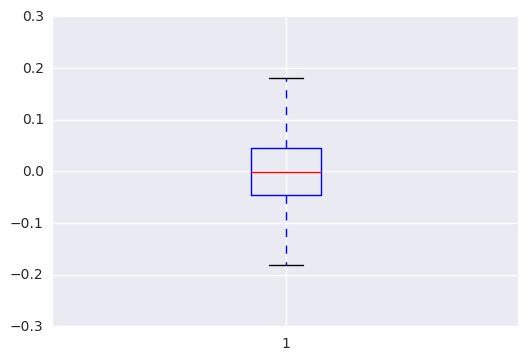

In [91]:
import seaborn as sns
#sns.boxplot(decompose_residual.Value)
%matplotlib inline
plt.boxplot(decompose_residual.Value,)

In [101]:
boxplot_data['Value'] = decompose_residual['Value']
boxplot_data['Month'] = pd.DatetimeIndex(decompose_residual.index).month

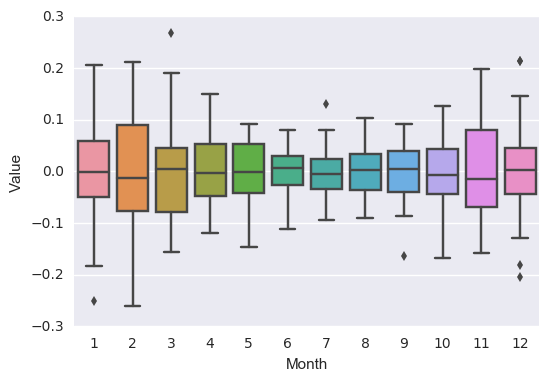

In [115]:
sns.boxplot(x=boxplot_data.Month,y=boxplot_data.Value)

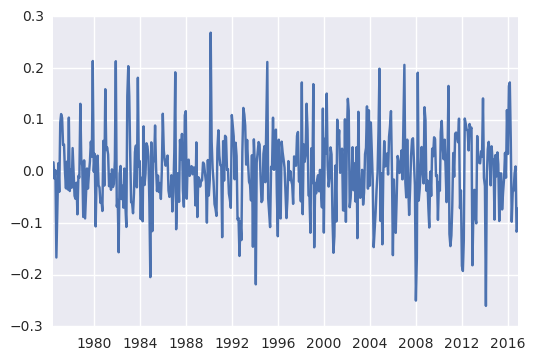

In [118]:
plt.plot(decompose.resid)

In [130]:
#Test if the Data Series is Stationary or not.
#decompose_residual = decompose_residual.drop(labels='Month',axis=1)
resid_test = stattools.adfuller(decompose_residual['Value'])
resid_test

(-8.6823190897054481,
 4.2532177744876926e-14,
 16,
 469,
 {'1%': -3.4443701538760858,
  '10%': -2.5700629410213627,
  '5%': -2.8677223235625151},
 -1122.8501860148526)

In [ ]:
#Create data to be used for removal of seasonal data
data = ts.drop(remove_col)
data.head()

In [138]:
Non_seasonal = data['Value'] - decompose_seasonal['Value']
Non_seasonal.head()

Month
1976-07-01   -0.055502
1976-08-01   -0.068338
1976-09-01   -0.014730
1976-10-01   -0.148124
1976-11-01   -0.022321
Name: Value, dtype: float64

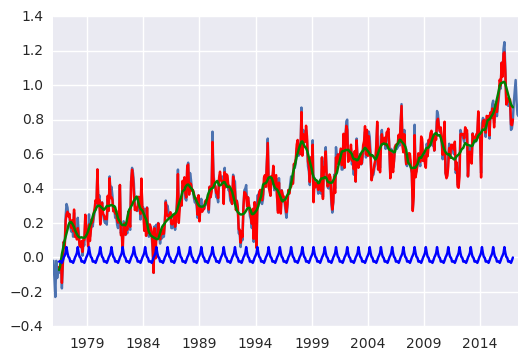

In [146]:
plt.plot(ts)
plt.plot(Non_seasonal,color='r')
plt.plot(decompose_trend,color='g')
plt.plot(decompose_seasonal,color='b')

In [145]:
Nonseasonal_test = stattools.adfuller(Non_seasonal)
Nonseasonal_test

(-2.9358276927830094,
 0.041337544595057195,
 3,
 482,
 {'1%': -3.4439899743408136,
  '10%': -2.5699737921179042,
  '5%': -2.8675550551408353},
 -926.85620050339821)